In [2]:
import numpy as np
import pandas as pd
from scipy.fftpack import fft, ifft, fftshift,fftfreq, ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from matplotlib import animation
import tqdm
from IPython.display import HTML
# %matplotlib inline


In [3]:
def fourier_transform(x, window_size, stride):
    """
    Args:
     - x: input data;
     - window_size: size of the sliding window;
     - stride: stride of the sliding window;
    
    Return:
     - tuple: (original data, fourier_transromation)
    """
    original_data = list()
    fourier_transformation = list()
    index = 0
    for i in range(len(x) - window_size):
        cur_window = x[index:index + window_size]
        if len(cur_window) == 0:
            break
        fourier = fft(cur_window)
        original_data.append(cur_window)
        fourier_transformation.append(fourier)
        index += stride
    return (original_data, fourier_transformation)

def graph_saver_one_strike(folder_to_save, norm_of_the_harmonicas):
    """
    Args:
     - folder_to_save: absolute path, where to save all graphs;
     - norm_of_the_harmonicas: norm of the harmonicas in each window of the strike.
     
    Return:
     - None
    """
    index = 1
    
    for window in tqdm.tqdm(norm_of_the_harmonicas):
        plt.figure(figsize=(15,10))
        plt.ylim(-2, 20)
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
        plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
        plt.plot(np.linspace(0,len(window) - 1, len(window) - 1), 
             window[1:], linewidth=3.0)
        plt.savefig(folder_to_save + 'window_' + str(index) + '.png')
        index+=1

def graph_saver_two_strikes(folder_to_save, norm_of_the_harmonicas_one, norm_of_the_harmonicas_two):
    """
    Args:
     - folder_to_save: absolute path, where to save all graphs;
     - norm_of_the_harmonicas: norm of the harmonicas in each window of the strike.
     
    Return:
     - None
    """
    index = 1
    
    for i in tqdm.tqdm(range(min(len(norm_of_the_harmonicas_one), len(norm_of_the_harmonicas_two)))):
        plt.figure(figsize=(15,10))
        plt.ylim(-2, 20)
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
        plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
        plt.plot(np.linspace(0,len(norm_of_the_harmonicas_one[i]) - 1, len(norm_of_the_harmonicas_one[i]) - 1), 
             norm_of_the_harmonicas_one[i][1:], linewidth=3.0)
        plt.plot(np.linspace(0,len(norm_of_the_harmonicas_two[i]) - 1, len(norm_of_the_harmonicas_two[i]) - 1), 
             norm_of_the_harmonicas_two[i][1:], linewidth=3.0)
        plt.savefig(folder_to_save + 'windows_' + str(index) + '.png')
        index+=1
        
def sort_window(window):
    """
    Sort window in decreasing order with indexes of the element.
    
    Args:
     - window: list of floats
    
    Return: 
     - sorted window: list of tuples
    """
    return [i for i in sorted(enumerate(window), key=lambda x:x[1]) if i[1] < 100]

def sort_whole_strike(strike_fourier):
    """
    """
    return [sort_window(window) for window in strike_fourier]

def take_n_max_elements(sorted_strike, n):
    """
    """
    return [window[-n:] for window in sorted_strike]

In [4]:
data = pd.read_csv('../data/my_dataset.txt', sep='\s+',header=None)
data.head()

,0,1,2
0,13463209,0.99319,15
1,13464268,1.00190,15
2,13466769,1.00700,15
3,13469274,1.00380,15
4,13471782,1.01250,15


# Visualisation of Fourier Transform

In [5]:
data.shape, float(data.shape[0]) / 5

((196735, 3), 39347.0)

In [6]:
window_size = 400
stride = 20
x = data[1]
real = x[13500:17000]
fake = x[178000:181000]

original_list_real, fourier_transformation_real = fourier_transform(real, window_size, stride)
norm_of_the_harmonicas_real = [[np.linalg.norm(k) for k  in x]  for x in fourier_transformation_real]

original_list_fake, fourier_transformation_fake = fourier_transform(fake, window_size, stride)
norm_of_the_harmonicas_fake = [[np.linalg.norm(k) for k  in x]  for x in fourier_transformation_fake]


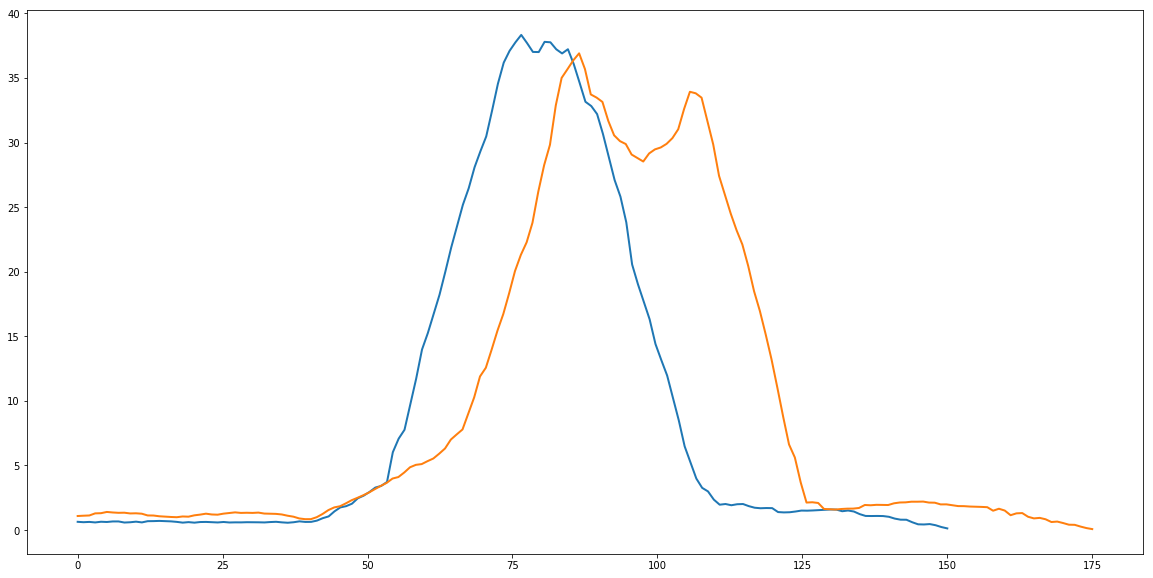

In [18]:
plt.figure(figsize=(20,10))
result_fake = [np.linalg.norm(sorted(x)[-5:-1]) for x in norm_of_the_harmonicas_fake]
result_real = [np.linalg.norm(sorted(x)[-5:-1]) for x in norm_of_the_harmonicas_real]

plt.plot(np.linspace(0,len(result_fake), len(result_fake)), result_fake, linewidth=2.0)
plt.plot(np.linspace(0,len(result_real), len(result_real)), result_real, linewidth=2.0)

plt.show()

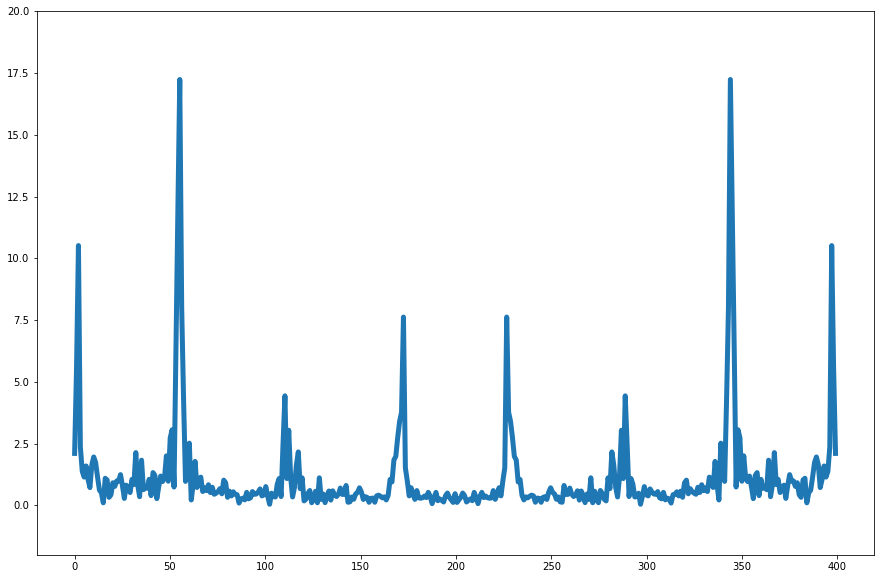

In [19]:
plt.figure(figsize=(15,10), frameon=False)
fig = plt.plot(np.linspace(0,len(norm_of_the_harmonicas_real[100]) - 1, len(norm_of_the_harmonicas_real[100]) - 1), 
         norm_of_the_harmonicas_real[100][1:], linewidth=5.0)

# plt.plot(np.linspace(0,len(norm_of_the_harmonicas_fake[100]) - 1, len(norm_of_the_harmonicas_fake[100]) - 1), 
#          norm_of_the_harmonicas_fake[100][1:], linewidth=5.0)
# plt.legend(["Real", "Fake"])
plt.ylim(-2, 20)

# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

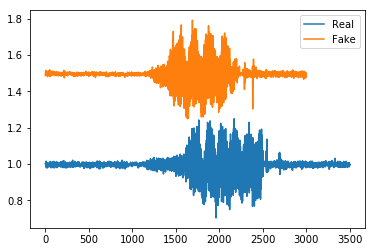

In [14]:
plt.plot(np.linspace(0, len(real), len(real)), real)
plt.plot(np.linspace(0, len(fake), len(fake)), fake + 0.5)
plt.legend(['Real', 'Fake'])

plt.show()

# Saving of the graphs

In [21]:
folder_to_save = '/home/bohdan/electron/fourier/visualisation/another_strike/'
window_size = 400
stride = 20
x = data[1]
real = data[1][94000:96500]

original_list_real, fourier_transformation_real = fourier_transform(real, window_size, stride)
norm_of_the_harmonicas_real = [[np.linalg.norm(k) for k  in x]  for x in fourier_transformation_real]
graph_saver_one_strike(folder_to_save, norm_of_the_harmonicas_real)

 16%|█▌        | 20/125 [00:06<00:31,  3.32it/s]/home/bohdan/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 125/125 [00:42<00:00,  2.77it/s]


# Saving Only Real labels

In [8]:
real_labels_data = data[data[2] == 9][1]
window_size = 400
stride = 20
values_real_labels, fourier_transformation_real_labels_data = fourier_transform(real_labels_data, window_size, stride)
graph_saver_one_strike = [[np.linalg.norm(k) for k  in x]  for x in fourier_transformation_real_labels_data]

In [8]:
folder_to_save = '/home/bohdan/electron/fourier/visualisation/only_real_strikes_data/'
graph_saver_one_strike(folder_to_save, norm_of_the_harmonicas_real_labels_data)

  3%|▎         | 20/715 [00:07<04:17,  2.70it/s]/home/bohdan/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 715/715 [04:39<00:00,  2.85it/s]


In [55]:
fake_data = pd.concat([data[data[2] == 8][1][:2000],data[data[2] == 8][1][2800:]])
window_size = 400
stride = 20
values_fake_labels, fourier_transformation_fake_labels_data = fourier_transform(fake_data, window_size, stride)
norm_of_the_harmonicas_fake_labels_data = [[np.linalg.norm(k) for k  in x]  for x in fourier_transformation_fake_labels_data]

In [ ]:
folder_to_save = '/home/bohdan/electron/fourier/visualisation/only_fake_strikes_data/'
graph_saver_one_strike(folder_to_save, norm_of_the_harmonicas_fake_labels_data)

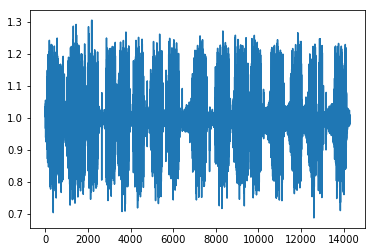

In [36]:
plt.plot(np.linspace(0, len(real_labels_data), len(real_labels_data)), real_labels_data)
plt.show()

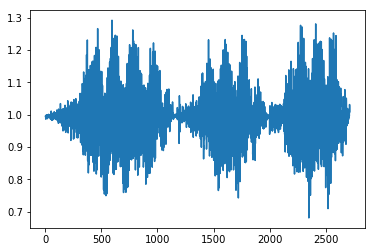

In [53]:
kik = pd.concat([data[data[2] == 8][1][:2000],data[data[2] == 8][1][2800:]])
plt.plot(np.linspace(0, len(kik), len(kik)), kik)
plt.show()

# Getting max harmonicas and their indexes

In [19]:
window_size = 400
stride = 20
x = data[1]

real = x[13500:17000]
original_list_real, fourier_transformation_real = fourier_transform(real, window_size, stride)
norm_of_the_harmonicas_real = [[np.linalg.norm(k) for k  in x]  for x in fourier_transformation_real]
sorted_strike = sort_whole_strike(norm_of_the_harmonicas_real)
max_elements = take_n_max_elements(sorted_strike, 30 )

In [112]:
lol = [[k[0] for k in x] for x in max_elements]
lol = np.asarray(lol).flatten()


In [113]:
# result = list()
result.append([pd.value_counts(lol)])

In [120]:
result[2][0].head()

334    64
66     61
344    54
56     53
233    45
dtype: int64

In [121]:
result[0][0].head()

343    36
344    32
57     30
56     29
234    27
dtype: int64

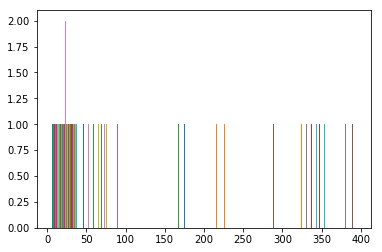

In [26]:
norm_of_the_harmonicas_real
plt.hist(max_elements[100])
plt.show()

In [27]:
max_elements[100]

[(51, 2.7331736271792866),
 (349, 2.7331736271792866),
 (170, 2.7573325419517292),
 (230, 2.7573325419517292),
 (113, 3.0404540799939594),
 (287, 3.0404540799939594),
 (52, 3.0601990567762223),
 (348, 3.0601990567762223),
 (171, 3.4059811392805082),
 (229, 3.4059811392805082),
 (172, 3.7693205675377421),
 (228, 3.7693205675377421),
 (58, 4.2505465069463106),
 (342, 4.2505465069463106),
 (111, 4.4334510512940017),
 (289, 4.4334510512940017),
 (2, 5.5278902382520849),
 (398, 5.5278902382520849),
 (54, 6.3765081715003902),
 (346, 6.3765081715003902),
 (173, 7.6202984963810874),
 (227, 7.6202984963810874),
 (57, 8.0097140592315181),
 (343, 8.0097140592315181),
 (3, 10.514216196875751),
 (397, 10.514216196875751),
 (55, 11.896775822945198),
 (345, 11.896775822945198),
 (56, 17.235366985916734),
 (344, 17.235366985916734)]